# Group 10 - Project Phase 1
This notebook is the work and submission of Group 10 of CSMODEL Section S16. The group's members consist of:
* David, Peter Jan B.
* De Guzman, Evan Mari B.
* Manaois, Kyla Nicole G.
* Wangkay, Laurize Jeante G.


## Brief Description of the Dataset
The dataset being used for this study is the Spotify Top-2000s Mega Dataset. This dataset contains the Top 2000 songs in spotify, ranging from the years 1956 to 2019. This dataset has been acquired from Kaggle.com and was produced by the user Sumat Singh.

### Data Collection Process
In collecting the data, the creator of this dataset used a third party website using this link, http://sortyourmusic.playlistmachinery.com/. This third party website uses the Spotify API to extract the data of a certain song and is then collected. The third party website was created by Paul Lamere.

### Structure of the Dataset
The structure of the dataset is quite simple. There exists 1994 observations or rows and there are 15 variables or columns. Each row is an entire set of information of a song, from its title and its artist, to its popularity. Each column represents a certain variable to be discussed further after this section. The only column that has no significance in the dataset is the index column attached with the dataset as to say that the index has no real merit in ranking the song. 

## Variables in the Dataset 
- **`Title`**: Name of the track.
- **`Artist`**: Name of the artist.
- **`Top Genres`**: Genre that the track applies to.
- **`Year`**: Release year of the track.
- **`Beats per Minute (BPM)`**: Tempo of the song.
- **`Energy`**: Energy of the song. A higher value pertains to the song being more energetic.
- **`Danceability`**: Danceability of the song. A higher value pertains to how easier it is to dance to a song.
- **`Loudness`**: Loudness of the song. A higher value pertains a louder song. 
- **`Valence`**: The positivity of a song. A higher value pertains to a more positive mood for the song.
- **`Length`**: The duration of the song.
- **`Acoustic`**: The acoustic value of the song. A higher value pertains that the song was made less electronically. 
- **`Speechiness`**: The presence of spoken words in the song. A higher value pertains that the song has more spoken words.
- **`Popularity`**: The popularity of a song. A higher value pertains to a more popular song.

## Data Cleaning


### Importing Libraries
For this section of the notebook, our main focus is simply cleaning the dataset. To fufill this purpose, it is a necessity to import the numpy and the pandas library.

In [1]:
import numpy as np
import pandas as pd

Then to load the dataset and view the first few rows with the use of `head()` function

In [2]:
spotify_df = pd.read_csv("Spotify-2000.csv")
spotify_df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


Now to view the general dataset information with the use of `info()` function

In [3]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

Thanks to the `info()` function, we can see that there are 1994 observations and 15 columns. And within the same function, we get to see that there are exactly 1994 non-null items in every column. To double-check, this code is employed.

In [4]:
spotify_df.isnull().any()

Index                     False
Title                     False
Artist                    False
Top Genre                 False
Year                      False
Beats Per Minute (BPM)    False
Energy                    False
Danceability              False
Loudness (dB)             False
Liveness                  False
Valence                   False
Length (Duration)         False
Acousticness              False
Speechiness               False
Popularity                False
dtype: bool

Now to further check the correctness of the data, the Title and Artists should have capitalized strings. To do so, the group employed the use of a function to return a boolean checking if the first character of a string is capitalized or not.

In [5]:
def is_capitalized(s):
    return s == s.title()

is_title = spotify_df['Title'].apply(is_capitalized)
is_artist = spotify_df['Artist'].apply(is_capitalized)

capital_check = pd.DataFrame(
    {
    'Title' : is_title,
    'Artist' : is_artist
    }
)
capital_check

,Title,Artist
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
1989,True,True
1990,True,True
1991,True,True
1992,True,True


### Uniqueness of Values

Now, there exists another possible problem in regards to the uniqueness of certain values. For example, the title "Hallelujah" has 3 different instances. Isolated within the variable 'Title', a method of data cleaning could have been employed. However, considering other variables such as Artist or Top Genre along with BPM, Valence and the such, no method of data cleaning will be employed on such values with the same title and thus are considered unique.

In [6]:
spotify_df.loc[(spotify_df['Title'] == 'Hallelujah')]

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
354,355,Hallelujah,Lisa Lois,dutch pop,2009,182,24,19,-13,11,11,226,24,3,49
1268,1269,Hallelujah,Leonard Cohen,canadian folk,1984,171,34,28,-13,13,23,277,72,3,67
1631,1632,Hallelujah,Jeff Buckley,alternative rock,1994,97,14,32,-10,18,8,414,93,3,73


### The Index Column

Here is a point of contention within the group for the use of the dataset within this section. The dataset is, by all means, clean. All Titles and Artists have correct data types and are in one proper format. The only problem that is noticed within this dataset is the use of an artificial number column called 'Index'. 

Meaning to say, the elements under 'Index' are simply numbers that have no real meaning or information. So as to say, a song having the Index number 1 does not denote it to be the Top 1 song in any possible relation with a variable. Due to this, it was decided upon by the group to have the Index column removed. To justify this decision, as mentioned, it is simply an incrementing artificial number and has no real value. Furthermore, data frames have a built-in identifying index per observation and thus is also redundant. To drop the column, the `drop()` function shall be used.

In [7]:
spotify_df = spotify_df.drop(['Index'], axis = 1)

Effectively, there are now only 14 columns or variables of interest.

### The Top Genres

The `Top Genres` column is quite a polarizing one. Consider that there are genres which are more categorically general but the dataset specifies the genre to the most possible specificity. In which case, the pre-processing of this data will require the group to bin and map nearly every possible unique entry to a general genre. 

First, the group will get the number of unique values within `Top Genres` using the `unique()` and `size` function.

In [8]:
spotify_df['Top Genre'].unique().size

149

From the code above, it returns 149 unique values in the Top Genre. By all metrics, there is too much and no possible relationships or conclusions can be made with this level of specificity. Thus, the group will create a function that checks the string within `Top Genre` and if falls under a specific condition. This condition generalizes all specific genres. 

In [9]:
def generalized_genre(genre):
    if 'metal' in genre:
        return 'metal'
    elif 'pop' in genre:
        return 'pop'
    elif 'rock' in genre:
        return 'rock'
    elif 'hip hop' in genre:
        return 'hip hop'
    elif 'adult' in genre:
        return 'adult'
    elif 'indie' in genre:
        return  'indie'
    elif any(sub_genre in genre for sub_genre in ['soul' or 'blues' or 'funk' or 'disco' or 'reggae']):
        return 'R&B'
    elif 'folk' in genre:
        return 'folk'
    elif 'british invasion' in genre:
        return 'rock'
    elif 'country' in genre:
        return 'country'
    else:
        return 'other'
    
spotify_df['General Genre'] = spotify_df['Top Genre'].apply(generalized_genre)
spotify_df.loc[36]


Title                                  Iris
Artist                    The Goo Goo Dolls
Top Genre                  alternative rock
Year                                   2007
Beats Per Minute (BPM)                  156
Energy                                   79
Danceability                             29
Loudness (dB)                            -6
Liveness                                  8
Valence                                  51
Length (Duration)                       290
Acousticness                              0
Speechiness                               4
Popularity                               75
General Genre                          rock
Name: 36, dtype: object

In this example, The song "Iris" by The Goo Goo Dolls is listed as "alternate rock". With the function that the group has applied, there now is a related `General Genre` with the generalized value "rock".

### Feature Engineering

The nature of this dataset is practically clean, besides the redundant `Index` column. In this case, to make up for the lack of need of data cleaning, the group will instead do feature engineering. In essence, the group will try to create new variables that can be of value for further analysis and study.

Firstly, we can make a categorized mood category that uses the Valence and Energy variables, called the `Affective Mood`. There would be three moods, those being Happy, Calm or Sad. 

In [10]:
def mood_category(row):
    if row['Valence'] > 50 and row['Energy'] > 50:
        return 'Happy'
    elif row['Valence'] > 50 and row['Energy'] <= 50:
        return 'Calm'
    else:
        return 'Sad'

spotify_df['Affective Mood'] = spotify_df.apply(mood_category, axis = 1)
spotify_df

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,General Genre,Affective Mood
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,adult,Calm
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,rock,Happy
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,hip hop,Happy
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,metal,Sad
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,rock,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63,adult,Calm
1990,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69,adult,Happy
1991,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74,rock,Happy
1992,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65,other,Calm


Another feature that we can add is the decade of the release of the song. For this, our primary focus is the `Year` variable and making a `Decade` variable.

In [11]:
spotify_df['Decade'] = (spotify_df['Year'] // 10) * 10
spotify_df

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,General Genre,Affective Mood,Decade
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,adult,Calm,2000
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,rock,Happy,2000
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,hip hop,Happy,2000
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,metal,Sad,2000
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,rock,Happy,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63,adult,Calm,1950
1990,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69,adult,Happy,1950
1991,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74,rock,Happy,1950
1992,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65,other,Calm,1950


Now there exists in our dataframe observations showing what decade a song has released. 

## Exploratory Data Analysis

In this portion, we perform an explanatory data analysis to have a comprehensive understanding of the Spotify dataset. This is to help in the formulation of the research question of the project.



### Importing more libraries

Considering the nature of exploratory data analysis, there is aneed for more python libraries. The said libraries would be `matplotlib`. 

In [12]:
import matplotlib.pyplot as plt

### Question 1 : What are the mean, median, mode, standard deviation, and variance for each numeric attribute (BPM, Energy, Danceability, Loudness, Valence, Length, Acousticness, Speechiness, Popularity)? 

To answer this question, we categorize these asked statistics (mean, median, mode, standard deviation, and variance) by attribute. Additionally, we convert any string values to numeric and remove them, as the code might also read column titles (e.g., "Energy: [values]"). For each column, we compute the mean, median, and mode, formatting the results to two decimal places.

In [13]:
numeric_columns = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)', 'Valence', 'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity']

summary_stats = {'Attribute': [], 'Mean': [], 'Median': [], 'Mode': [], 'Standard Deviation': [], 'Variance': []}

for column in numeric_columns:
    if column in spotify_df.columns:
        spotify_df[column] = pd.to_numeric(spotify_df[column], errors='coerce')

        summary_stats['Attribute'].append(column)
        summary_stats['Mean'].append(spotify_df[column].mean())
        summary_stats['Median'].append(spotify_df[column].median())
        summary_stats['Mode'].append(spotify_df[column].mode().dropna().values[0] if not spotify_df[column].mode().dropna().empty else None)
        summary_stats['Standard Deviation'].append(spotify_df[column].std())
        summary_stats['Variance'].append(spotify_df[column].var())
    else:
        print(f"Column {column} not found in the DataFrame")

summary_df = pd.DataFrame(summary_stats)

summary_df['Mean'] = summary_df['Mean'].map("{:.2f}".format)
summary_df['Median'] = summary_df['Median'].map("{:.2f}".format)
summary_df['Mode'] = summary_df['Mode'].map("{:.2f}".format)
summary_df['Standard Deviation'] = summary_df['Standard Deviation'].map("{:.2f}".format)
summary_df['Variance'] = summary_df['Variance'].map("{:.2f}".format)

summary_df

,Attribute,Mean,Median,Mode,Standard Deviation,Variance
0,Beats Per Minute (BPM),120.22,119.00,125.00,28.03,785.57
1,Energy,59.68,61.00,76.00,22.15,490.81
2,Danceability,53.24,53.00,53.00,15.35,235.67
3,Loudness (dB),-9.01,-8.00,-7.00,3.65,13.31
4,Valence,49.41,47.00,30.00,24.86,617.93
5,Length (Duration),260.36,245.00,215.00,81.20,6593.75
6,Acousticness,28.86,18.00,0.00,29.01,841.70
7,Speechiness,4.99,4.00,3.00,4.40,19.37
8,Popularity,59.53,62.00,69.00,14.35,205.97


We can examine the distribution of the data using histograms. Histograms visualize the distribution of a single variable, providing insights into the shape of the distribution (e.g., skewness). The provided code generates histograms for each attribute, giving a detailed view of the data distribution and a concise summary of key statistics.

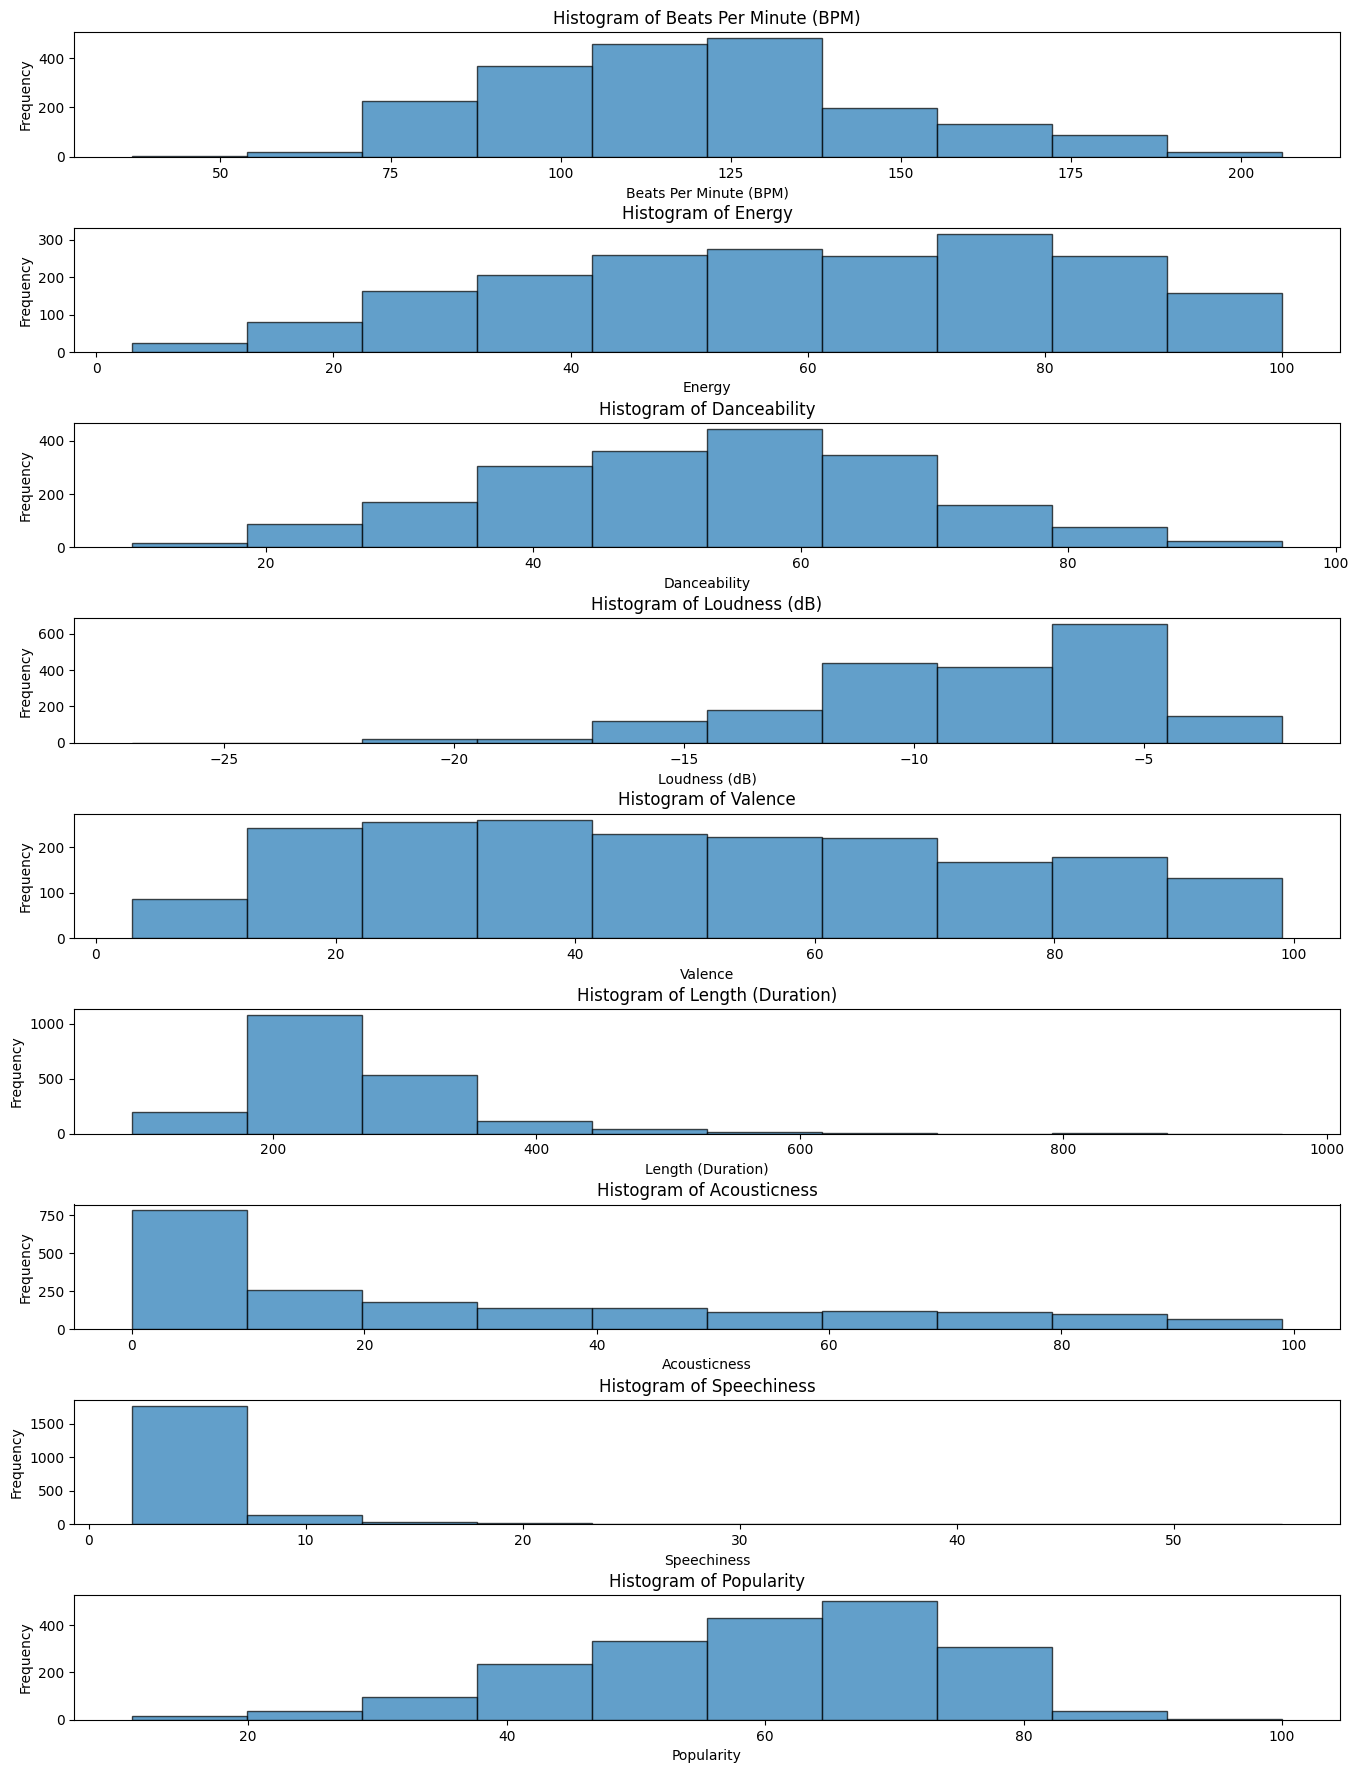

In [14]:
fig, axs = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(14, 2 * len(numeric_columns)))
fig.tight_layout(pad=3.0)

for i, column in enumerate(numeric_columns):
    if column in spotify_df.columns:
        spotify_df[column] = pd.to_numeric(spotify_df[column], errors='coerce')
      
        axs[i].hist(spotify_df[column], bins=10, edgecolor='black', alpha=0.7)
        axs[i].set_title(f'Histogram of {column}')
        axs[i].set_xlabel(column)
        axs[i].set_ylabel('Frequency')

    else:
        print(f"Column {column} not found in the DataFrame")

plt.show()

The visualizations above shows us the different behaviours and characteritics of the data and how their central tendency are. For exmaple, the histogram depicting the length (Duration) data reveals a left-skewed distribution, while the histogram of danceability is the most normal distribution. 

### Question 2: Which genres are most prevalent in this dataset?

For the Numerical Summary, we will calculate the frequency of each genre.

In [15]:
genre_counts = spotify_df['Top Genre'].value_counts()

top_genres = genre_counts.head(10)
print(top_genres)

Top Genre
album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
dutch indie           75
alternative metal     70
dance rock            52
classic rock          51
dutch cabaret         51
Name: count, dtype: int64


For the Visualization, bar chart will be used to display the most prevalent genres.

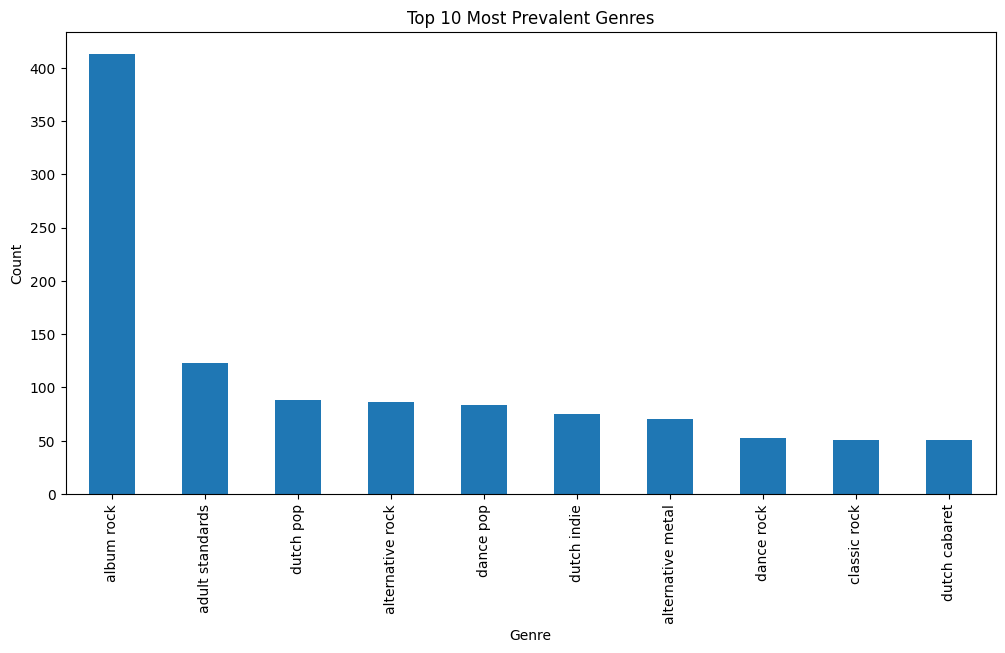

In [16]:
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar')
plt.title('Top 10 Most Prevalent Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

The frequency count shows which genres are most common in the dataset, with Album Rock being the most common genre in the dataset. The bar chart provides a visual representation, making it easier to compare the prevalence of different genres at a glance.

Considering the specificity of the `Top Genre` column, the same analysis can be done on the `General Genre` column so as to see for any future possibilities. 

General Genre
rock       883
pop        398
other      313
adult      123
metal       93
indie       79
R&B         45
hip hop     29
folk        19
country     12
Name: count, dtype: int64


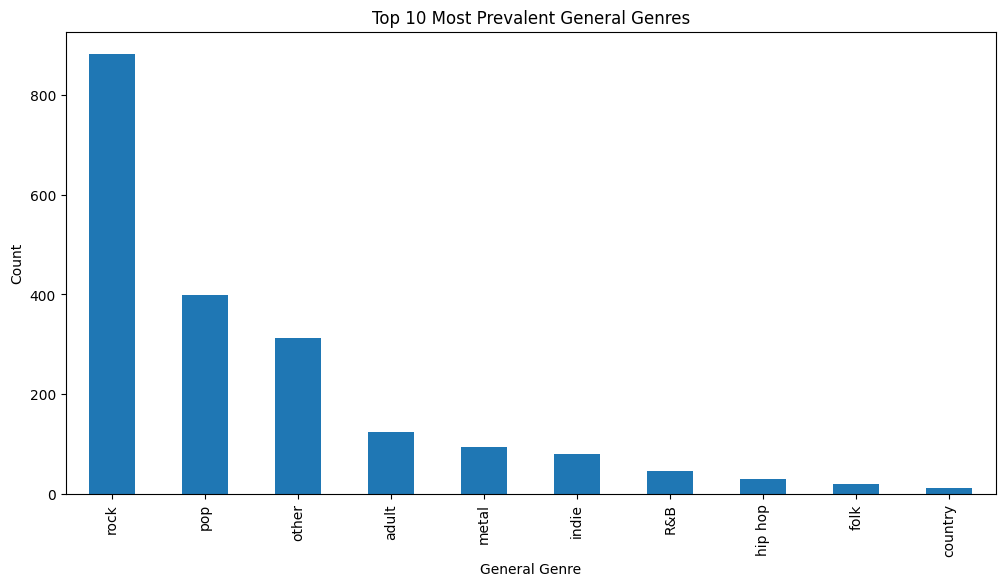

In [17]:
gen_genre_counts = spotify_df['General Genre'].value_counts()

gen_genres = gen_genre_counts.head(10)
print(gen_genres)

plt.figure(figsize=(12, 6))
gen_genres.plot(kind='bar')
plt.title('Top 10 Most Prevalent General Genres')
plt.xlabel('General Genre')
plt.ylabel('Count')
plt.show()

### Question 3: What is the average song length `Length (Duration)` by genre?

For the Numerical Summary, we will calculate the average song duration for each genre.

In [18]:
average_duration_genre = spotify_df.groupby('Top Genre')['Length (Duration)'].mean().sort_values(ascending=False)

print(average_duration_genre)

Top Genre
finnish metal              444.500000
italian pop                391.000000
contemporary vocal jazz    384.000000
chamber pop                374.000000
funk                       353.384615
                              ...    
arkansas country           179.222222
pop punk                   167.000000
motown                     167.000000
chicago soul               166.000000
rock-and-roll              157.000000
Name: Length (Duration), Length: 149, dtype: float64


For the Visualization, a box plot will be used to show the distribution of song lengths by genre.

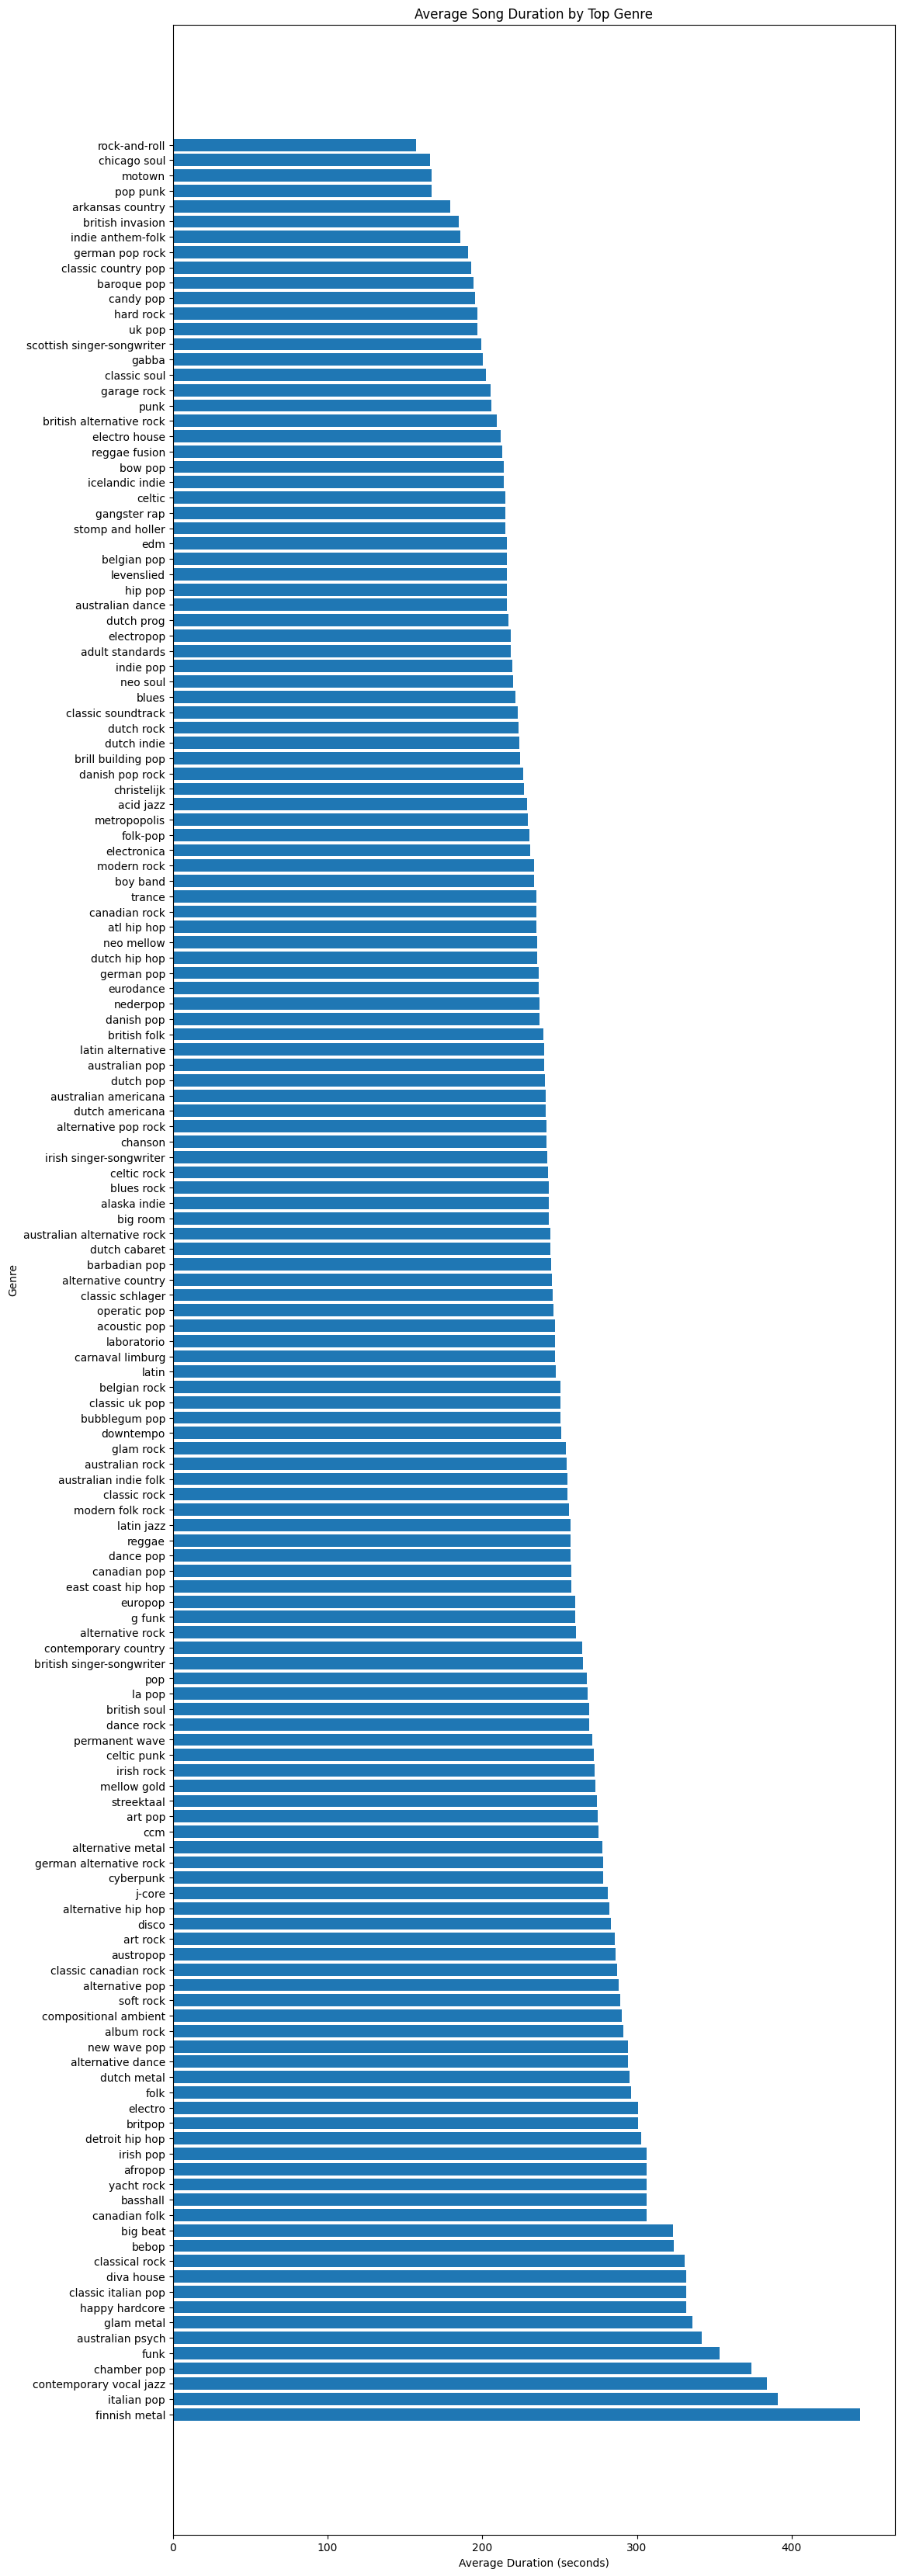

In [19]:
plt.figure(figsize=(12, 42))
plt.barh(average_duration_genre.index, average_duration_genre.values)
plt.title('Average Song Duration by Top Genre')
plt.xlabel('Average Duration (seconds)')
plt.ylabel('Genre')
plt.show()

The average song length for each genre provides insight into how song durations vary across genres. The bar chart visualizes these averages, highlighting genres with notably longer or shorter songs on average.

### Question 4: What genres tend to have longer song durations?
For the Numerical Summary, we can refine the previous data by highlighting the top 10 genres with the longest song durations. This approach allows us to easily identify which genres have the highest average durations.

In [20]:
average_duration_genre = spotify_df.groupby('Top Genre')['Length (Duration)'].mean().sort_values(ascending=False)

top_average_duration_genre = average_duration_genre.head(4)
print(top_average_duration_genre)

Top Genre
finnish metal              444.5
italian pop                391.0
contemporary vocal jazz    384.0
chamber pop                374.0
Name: Length (Duration), dtype: float64


For the Visualization, we will use a box plot to compare the distribution of song lengths across various genres.

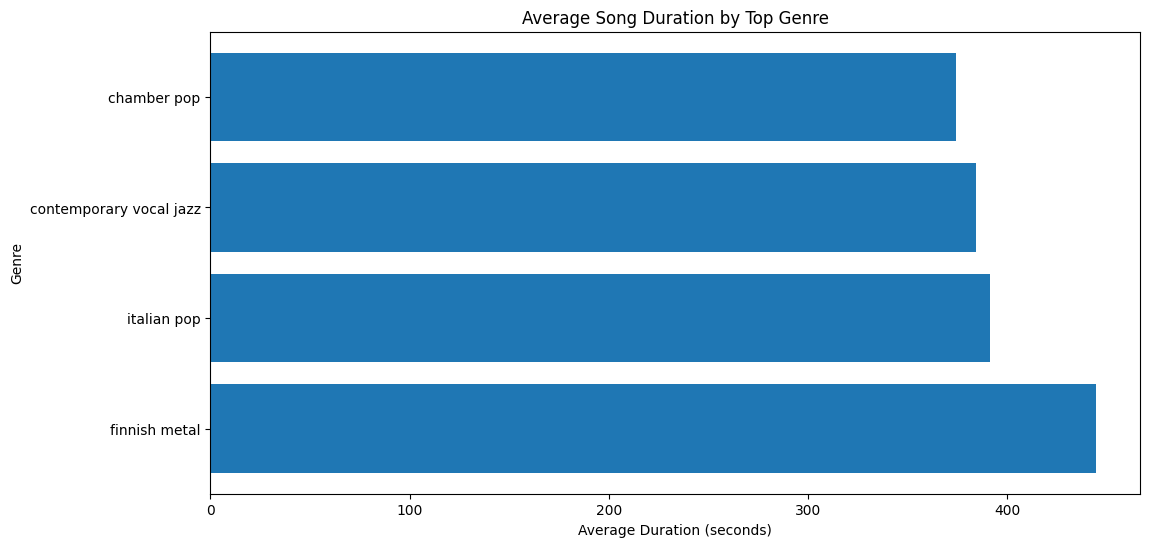

In [21]:
plt.figure(figsize=(12, 6))
plt.barh(top_average_duration_genre.index, top_average_duration_genre.values)
plt.title('Average Song Duration by Top Genre')
plt.xlabel('Average Duration (seconds)')
plt.ylabel('Genre')
plt.show()

The average song length for each genre highlights which genres have longer average song durations, with Finnish Metal having the longest. The box plot displays the distribution of song lengths for the top 10 genres with the longest average durations, showing the spread and any potential outliers.

To provide broader, more consistent categories that can simplify analysis and visualization, and make the results clearer, we can use the  `General Genre` column.

General Genre
metal      292.494624
folk       288.000000
rock       269.956769
other      260.300319
hip hop    259.482759
pop        253.804020
R&B        248.511111
indie      223.797468
adult      218.626016
country    198.916667
Name: Length (Duration), dtype: float64


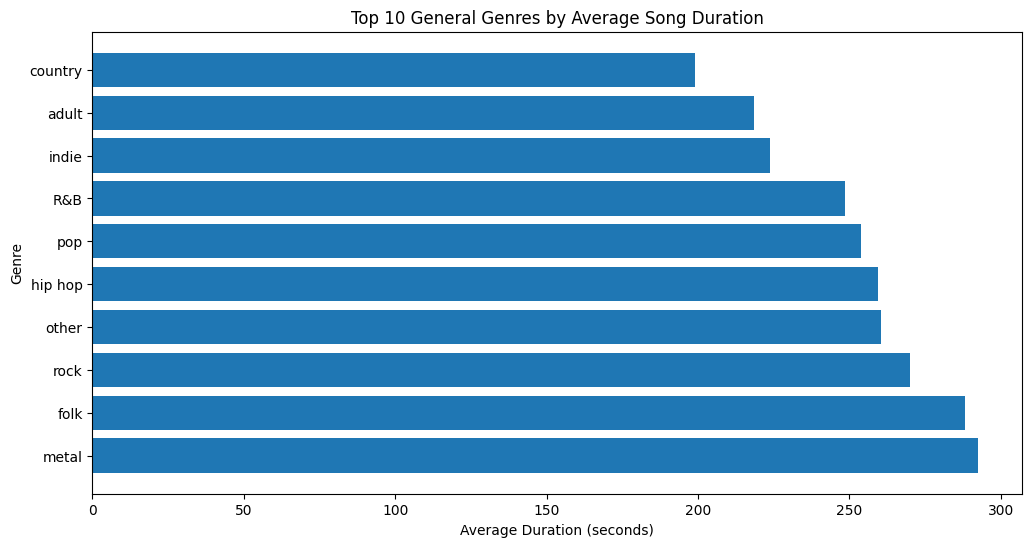

In [22]:
average_duration_gen_genre = spotify_df.groupby('General Genre')['Length (Duration)'].mean().sort_values(ascending=False)

top_gen_genres_duration = average_duration_gen_genre.head(10)
print(top_gen_genres_duration)

plt.figure(figsize=(12, 6))
plt.barh(top_gen_genres_duration.index, top_gen_genres_duration.values)
plt.title('Top 10 General Genres by Average Song Duration')
plt.xlabel('Average Duration (seconds)')
plt.ylabel('Genre')
plt.show()

### Question 5: Which `Top Genre` has the highest average `Popularity`? 

For the Numerical Summary, we will compute the average popularity for each genre and identify the one with the highest average.

In [23]:
average_popularity_genre = spotify_df.groupby('Top Genre')['Popularity'].mean().sort_values(ascending=False)

top_genres_popularity = average_popularity_genre.head(10)
print(top_genres_popularity)

Top Genre
celtic punk         83.000000
indie pop           83.000000
australian psych    80.500000
ccm                 80.000000
electro house       80.000000
danish pop          80.000000
atl hip hop         79.000000
pop punk            79.000000
electropop          78.333333
la pop              78.000000
Name: Popularity, dtype: float64


For the Visualization, we will use a bar chart to display the average popularity for the top genres.

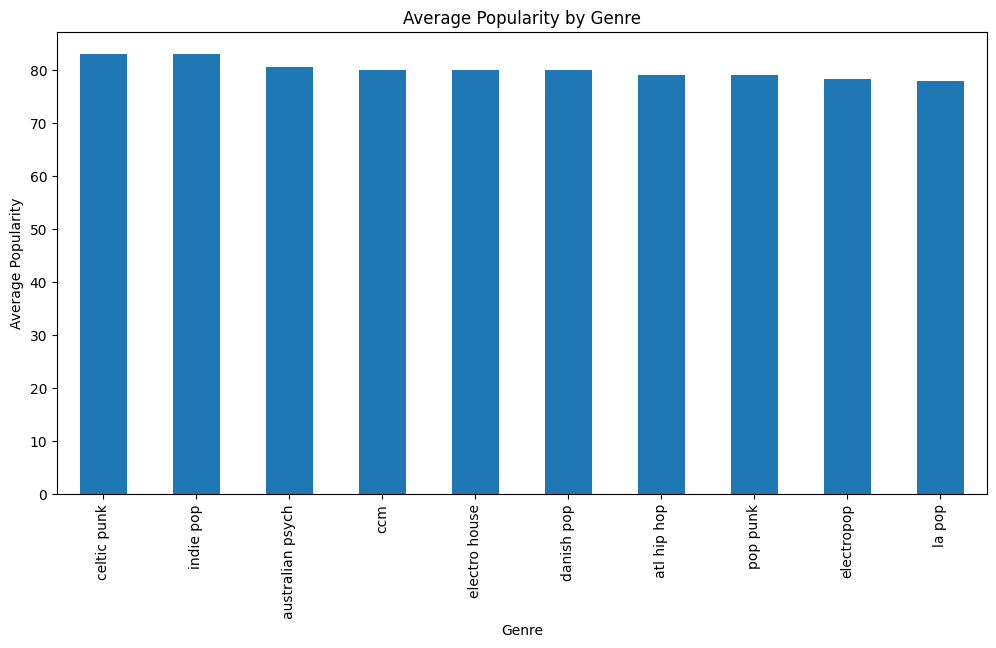

In [24]:
plt.figure(figsize=(12, 6))
top_genres_popularity.plot(kind='bar')
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()

The average popularity for each genre reveals which genres tend to have more popular songs. Celtic Punk and Indie Pop stand out as the top genres in terms of average popularity. The bar chart visually compares these averages, making it easy to identify the genre with the highest average popularity.

Similar to previous questions, we can analyze the `General Genre` column to further simplify analysis and visualization.

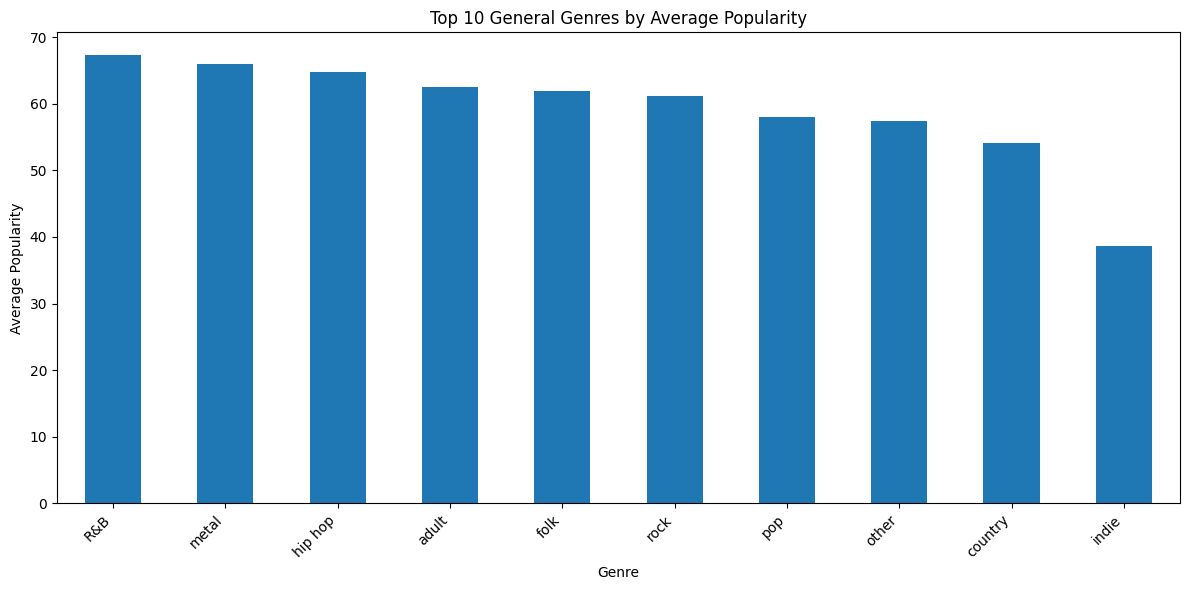

In [25]:
average_popularity_gen_genre = spotify_df.groupby('General Genre')['Popularity'].mean().sort_values(ascending=False)

top_gen_genres_popularity = average_popularity_gen_genre.head(10)

plt.figure(figsize=(12, 6))
top_gen_genres_popularity.plot(kind='bar')
plt.title('Top 10 General Genres by Average Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Question 6: How do the average values of numeric features change over the years (Year-wise trends)?

To analyze year-wise trends, we start by extracting unique years from the dataset. Next, we group these years accordingly. We then select the numeric variables for comparison, converting non-numeric titles to NaN and excluding them from the analysis. Finally, we get the mean.

In [26]:
unique_years = spotify_df['Year'].unique()
year_mapping = {year: f'{year} Group' for year in unique_years}
spotify_df['Year Group'] = spotify_df['Year'].map(year_mapping)

numeric_columns = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)', 'Valence', 'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity']
spotify_df[numeric_columns] = spotify_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

yearly_mean = spotify_df.groupby('Year Group')[numeric_columns].mean()

To visualize the mean of numeric values categorized by year, we will display it via a line plot to show the trends per year.

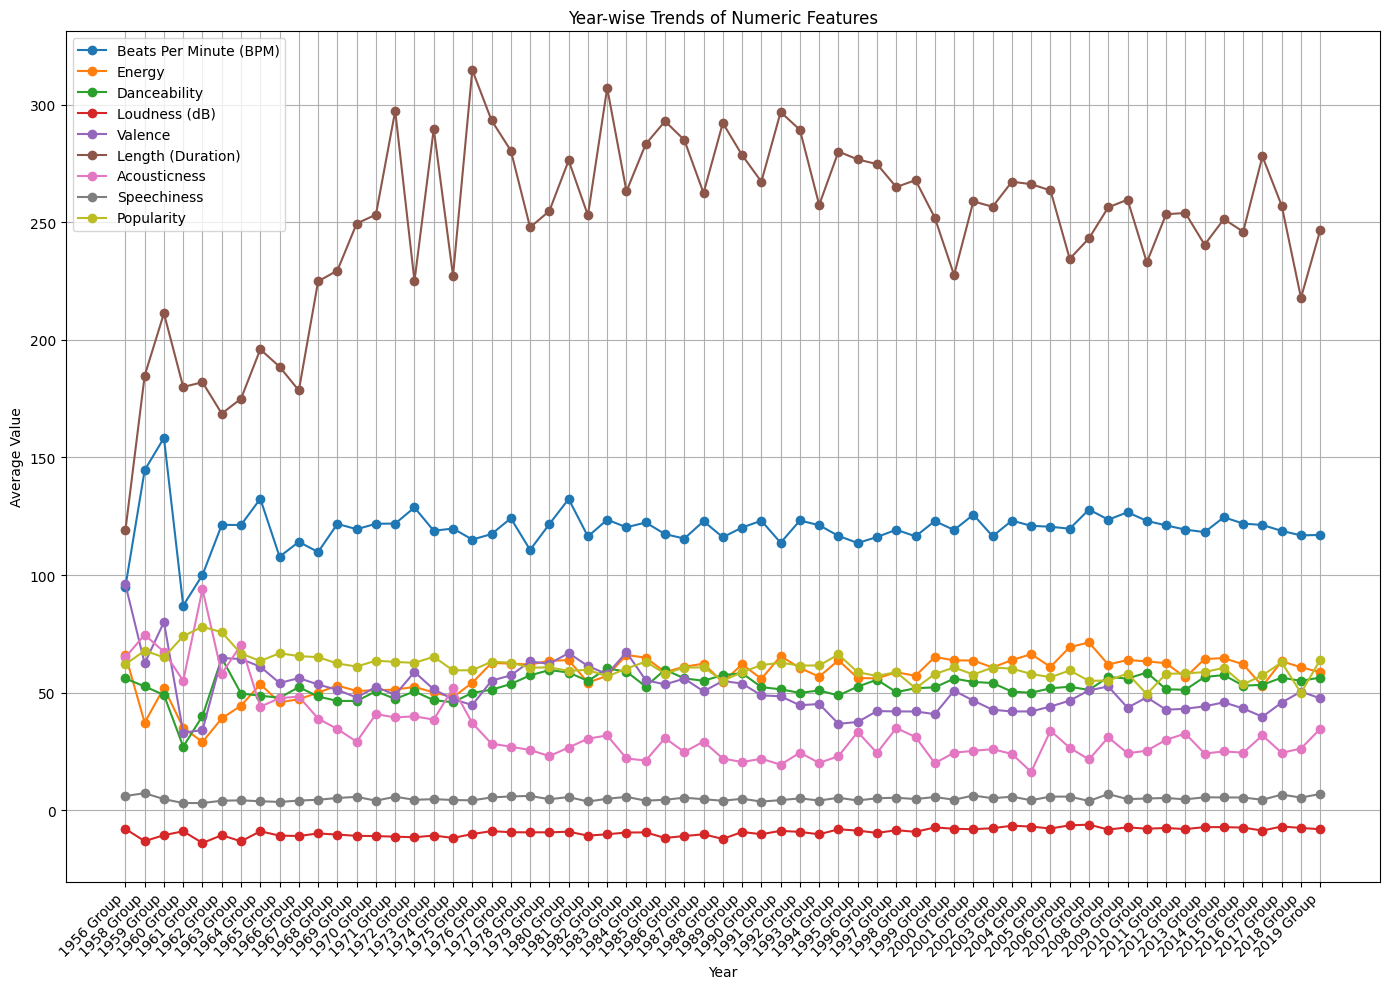

In [27]:
plt.figure(figsize=(14, 10))  
for column in yearly_mean.columns:
    plt.plot(yearly_mean.index, yearly_mean[column], marker='o', label=column)

plt.title('Year-wise Trends of Numeric Features')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.xticks(yearly_mean.index, rotation=45, ha='right')  #for readability
plt.tight_layout()
plt.show()

# Research Question

At this point, the group had finished the exploratory data analysis. Given the questions that was asked within and the subsequent data analysis, the group had decided upon this ONE research question moving forward.

``How do attributes such as 'Trend (by year)', 'Top Genre,' and 'Beats per Minute (BPM)' of songs relate to their 'Popularity', and can these relationships be used to predict the popularity of new songs using clustering methods?``

## Significance

Understanding the factors that contribute to a song's reach can have significant effects on the industry of music. This research can provide insights into what makes a song successful by examining the relationship between song qualities (such as the trend over years, genre, and BPM) and their popularity. When releasing and promoting new music, these insights may help musicians, producers, and record companies in making data-driven decisions.

Moreover, the study can provide predictive models for predicting the success of new releases by using clustering techniques to find patterns and group related music. This can be especially helpful in a market that is dynamic and fiercely competitive, where keeping up with trends is essential for business success.

# Data Modelling

In this section of the notebook, the group will commence on statistical data modelling with the use of (associative rule mining, clusters or recommender systems). This will help the group in determining the answer to the research question ``How do attributes such as 'Trend (by year)', 'Top Genre,' and 'Beats per Minute (BPM)' of songs relate to their 'Popularity', and can these relationships be used to predict the popularity of new songs using clustering methods?``  

Firstly the `apriopri` and `association_rules` functions from the `mlxtend` library. Moving on, there has to be an instantiated object to be able to fully use the functions within `KMeans` to perform k-mean clustering algorithm

In [28]:
from mlxtend.frequent_patterns import apriori, association_rules

In [43]:
#association_df = spotify_df[['Top Genre', 'Energy', 'Danceability', 'Popularity']].copy()
#association_df['High Energy'] = association_df['Energy'] > 60
#association_df['High Danceability'] = association_df['Danceability'] > 60
#association_df['High Popularity']

association_df = spotify_df[['Beats Per Minute (BPM)', 'Danceability', 'Energy', 'Popularity', 'General Genre', 'Decade']].copy()
association_df['BPM_bin'] = pd.cut(association_df['Beats Per Minute (BPM)'], bins = [0, 90, 120, 180], labels =['Low BPM', 'Medium BPM', 'High BPM'])
association_df['Dance_bin'] = pd.cut(association_df['Danceability'], bins = [0, 20, 50, 70], labels = ['Low Danceability', 'Medium Danceability', 'High Danceability'])
association_df['Popularity_bin'] = pd.cut(association_df['Popularity'], bins = [0, 25, 50, 75], labels= ['Not Popular', 'Average Popularity', 'Very Popular'])

association_df['Decade']  = association_df['Decade'].astype('category')

one_hot = pd.get_dummies(association_df[['General Genre', 'BPM_bin', 'Dance_bin', 'Decade', 'Popularity_bin']])
frequent = apriori(one_hot, min_support=0.05, use_colnames=True)

rules = association_rules(frequent, metric='confidence', min_threshold=0.5)

very_popular_rules = rules[rules['consequents'].apply(lambda x: 'Popularity_bin_Very Popular' in x)]

very_popular_rules.drop(columns=['lift', 'leverage', 'conviction', 'zhangs_metric'])

very_popular_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(General Genre_other),(Popularity_bin_Very Popular),0.156971,0.615848,0.089268,0.568690,0.923427,-0.007402,0.890665,-0.089554
3,(General Genre_rock),(Popularity_bin_Very Popular),0.442828,0.615848,0.301906,0.681767,1.107038,0.029191,1.207141,0.173535
5,(BPM_bin_Low BPM),(Popularity_bin_Very Popular),0.152959,0.615848,0.089769,0.586885,0.952972,-0.004430,0.929893,-0.055053
7,(BPM_bin_Medium BPM),(Popularity_bin_Very Popular),0.372116,0.615848,0.241224,0.648248,1.052611,0.012057,1.092112,0.079603
9,(BPM_bin_High BPM),(Popularity_bin_Very Popular),0.453360,0.615848,0.272818,0.601770,0.977141,-0.006382,0.964650,-0.041039
10,(Dance_bin_Medium Danceability),(Popularity_bin_Very Popular),0.411234,0.615848,0.251254,0.610976,0.992089,-0.002004,0.987477,-0.013363
12,(Dance_bin_High Danceability),(Popularity_bin_Very Popular),0.447342,0.615848,0.274323,0.613229,0.995748,-0.001172,0.993229,-0.007668
13,(Decade_1960),(Popularity_bin_Very Popular),0.079238,0.615848,0.057673,0.727848,1.181864,0.008875,1.411537,0.167121
14,(Decade_1970),(Popularity_bin_Very Popular),0.177031,0.615848,0.132899,0.750708,1.218984,0.023875,1.540975,0.218288
15,(Decade_1980),(Popularity_bin_Very Popular),0.172518,0.615848,0.111836,0.648256,1.052624,0.005591,1.092136,0.060416


# Statistical Inference

Given all the data presented, the group will now move on to statistical inference. In this part of the notebook, the group will now focus solely on hypothesis testing and inference to reach a conclusion on the given research question. Moving forward, here are the hypotheses of the group:

*H<sub>0</sub>* = There is a relationship between popularity and other attributes such as Trend, Top Genre and Beats per Minute <br>
*H<sub>A</sub>* = There is no relationship between popularity and other attributes such as Trend, Top Genre and Beats per Minute

# Insights and Conclusions